## Linear Regression using multiple variables (Multiple Linear Regression)
- Build a linear regression model in Python using the scikit-learn package. 
- Predict the calories spent during cycling around the neighborhood 

- y = mx + b  (best fit line)
- m = slope
- b = intercept

- Target: Y variable (Prediction)

- Independent variable (x) are the input for a process that is being analyzes
- Dependent variable (Y) are the output of the process

- Multiple Linear regression (lots of features)

Story:
- Our family enjoy bike riding and take pictures of animals in our neighborhood! 

Inputs and description of the features:
- The dataset consists of cycling duration, calories spent, distance miles, and animals in my neighborhood.
- Distance Miles: Biking distance in miles
- Calor: Calories 
- Total Calories: Total calories
- AvgSpeedmph: Average speed in mph
- TotalAscent: Total Ascent
- TotalDescent: Total Descent
- ElevationGainft: Elevation
- Exercise: Cycling or Dog Walking 
- GoalMiles: Set goal in miles on my phone
- Weather: Cloudy or Sunny
- Goal Miles: Goal miles are 3, 5, or 10 depending on the user Samsung Health app selection
- GoalReached: Goal reached? Yes or No
- Tired: Are you tired after the bike riding? Yes or No
- Pictures Taken: Picture taken? Yes or No
- Animals: Do you see animals during the bike riding? Yes or No
- Iguanas, Egyptian Goose, and Squirrel: Count animals if possible

Reasons for biking:

- Cycling is freedom. The unique feeling I have on a bike is the freedom I feel wherever I am or wherever I am going. 
- It makes me fit. I started cycling 6 months ago and I'm loving the effect it's having on my energy levels.
- I can praise God for his creation. Psalm 19:1 - The heavens declare the glory of God; And the firmament shows His handiwork.
- It's an adventure!

## Import Libraries 

In [1]:
# Libraries
import numpy as np                   # Data Statistical numerical analysis
import pandas as pd                  # Dataframe manipulation and exploring 
import seaborn as sns                # Statistical Data Vizualization. Visualize the data and explore various aspects of the data in a graphical format 
import matplotlib.pyplot as plt      # Data Visualization (Plotting library)
%matplotlib inline 
sns.set(style="white")

# Plotly's Python graphing library makes interactive, publication-quality graphs
# Plotly Express is a built-in part of the plotly library
# The plotly.express module is plotly’s high-level API for rapid figure generation. High-level interface for data visualization

import plotly.offline as py          
import chart_studio
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import plotly.express as px          
import scipy as sp
import plotly.graph_objects as go

# PYCARET machine learning in Python
from pycaret.classification import *
from pandas_profiling import ProfileReport
from plotly.subplots import make_subplots

py.offline.init_notebook_mode(connected = True)    # offline mode jupyter notebook will be connected
cf.go_offline()

## Import Dataset
### Importing data is the first step in any data science project. 

In [2]:
# Read the dataset using pandas dataframe
workout = pd.read_csv('Workout.csv')

## Explore Data Analysis (EDA) technique which is used to understand the data¶

In [3]:
# View the first rows
workout.head()

,Date,StartTime,EndTime,Workout duration,Total Duration,Weather,Exercise,Goal Miles,Distance Miles,Calor,...,TotalAscent,TotalDescent,ElevationGainft,GoalReached,Tired?,Pictures taken,Animals seen,Iguanas,Egyptian Goose,Squirrel
0,6/29/2020,19:57,20:40,0:42:00,0:43:00,Partly Cloudy,Cycling,5,6.19,271,...,0.83,0.81,723,yes,yes,yes,yes,5,0,0
1,7/1/2020,19:28,19:56,0:23:00,0:28:00,Sunny,Cycling,5,3.44,156,...,0.79,0.89,636,no,yes,no,yes,2,0,1
2,7/6/2020,20:10,21:09,0:52:00,0:59:00,Partly Cloudy,Cycling,5,6.60,283,...,0.58,0.50,428,yes,no,yes,yes,1,2,1
3,7/7/2020,20:07,21:32,1:06:00,1:10:00,Partly Cloudy,Cycling,5,9.44,411,...,1.20,1.57,1105,yes,yes,yes,no,2,0,0
4,7/8/2020,20:28,21:23,0:56:00,0:59:00,Partly Cloudy,Cycling,5,6.68,285,...,0.95,0.91,810,yes,yes,no,no,1,4,0


In [4]:
# View the last rows
workout.tail()

,Date,StartTime,EndTime,Workout duration,Total Duration,Weather,Exercise,Goal Miles,Distance Miles,Calor,...,TotalAscent,TotalDescent,ElevationGainft,GoalReached,Tired?,Pictures taken,Animals seen,Iguanas,Egyptian Goose,Squirrel
26,10/31/2020,15:18,15:46,0:26:25,0:28:36,Cloudy,Cycling,3,4.25,189,...,0.68,0.68,405,yes,no,no,yes,9,0,2
27,11/1/2020,13:46,14:13,0:21:09,0:27:16,Partly Cloudy,Cycling,3,3.11,136,...,0.40,0.42,276,yes,no,no,yes,51,2,6
28,11/2/2020,12:36,12:59,0:22:43,0:23:10,Cloudy,Cycling,3,3.77,174,...,0.82,0.71,428,yes,no,no,yes,2,0,1
29,11/6/2020,11:16,11:45,0:29:07,0:30:29,Partly Cloudy,Cycling,3,4.35,195,...,0.89,0.53,315,yes,yes,no,yes,13,6,1
30,11/13/2020,11:31,11:55,0:22:14,0:24:21,Sunny,Cycling,3,3.37,146,...,0.45,0.52,385,yes,yes,yes,yes,45,67,6


In [5]:
# View Statistical details. Shows statistics for every numerical column in the dataset
workout.describe()

,Goal Miles,Distance Miles,Calor,Total Calories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft,Iguanas,Egyptian Goose,Squirrel
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,4.129032,4.828065,216.258065,232.322581,8.932258,14.667742,0.898065,0.922581,833.967742,11.193548,6.032258,1.774194
std,1.857273,2.171264,101.860351,104.239272,0.898661,2.321836,0.762659,0.734883,880.406212,16.050793,14.388616,2.155762
min,2.000000,2.130000,92.000000,107.000000,7.500000,10.900000,0.160000,0.100000,111.000000,1.000000,0.000000,0.000000
25%,3.000000,3.320000,143.000000,147.000000,8.200000,13.400000,0.415000,0.500000,277.500000,2.000000,0.000000,0.000000
50%,3.000000,3.980000,176.000000,197.000000,8.900000,14.800000,0.770000,0.690000,428.000000,3.000000,0.000000,1.000000
75%,5.000000,6.290000,280.500000,293.500000,9.550000,16.300000,1.075000,1.165000,1037.500000,11.000000,3.500000,3.000000
max,10.000000,10.150000,495.000000,513.000000,11.500000,18.900000,3.520000,3.290000,3701.000000,54.000000,67.000000,6.000000


In [6]:
# Shows the rows count and the types. Print summary of the dataframe. There are none null elements.  
workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              31 non-null     object 
 1   StartTime         31 non-null     object 
 2   EndTime           31 non-null     object 
 3   Workout duration  31 non-null     object 
 4   Total Duration    31 non-null     object 
 5   Weather           31 non-null     object 
 6   Exercise          31 non-null     object 
 7   Goal Miles        31 non-null     int64  
 8   Distance Miles    31 non-null     float64
 9   Calor             31 non-null     int64  
 10  Total Calories    31 non-null     int64  
 11  AvgSpeedmph       31 non-null     float64
 12  MaxSpeedmph       31 non-null     float64
 13  TotalAscent       31 non-null     float64
 14  TotalDescent      31 non-null     float64
 15  ElevationGainft   31 non-null     int64  
 16  GoalReached       31 non-null     object 
 17 

In [7]:
# Number of columns or features in the dataset
workout.columns

Index(['Date', 'StartTime', 'EndTime', 'Workout duration', 'Total Duration',
       'Weather', 'Exercise', 'Goal Miles', 'Distance Miles', 'Calor',
       'Total Calories', 'AvgSpeedmph', 'MaxSpeedmph', 'TotalAscent',
       'TotalDescent ', 'ElevationGainft', 'GoalReached', 'Tired?',
       'Pictures taken', 'Animals seen', 'Iguanas', 'Egyptian Goose',
       'Squirrel'],
      dtype='object')

In [8]:
# No null values in the dataset. No imputation needed. 
workout.isnull().sum()

Date                0
StartTime           0
EndTime             0
Workout duration    0
Total Duration      0
Weather             0
Exercise            0
Goal Miles          0
Distance Miles      0
Calor               0
Total Calories      0
AvgSpeedmph         0
MaxSpeedmph         0
TotalAscent         0
TotalDescent        0
ElevationGainft     0
GoalReached         0
Tired?              0
Pictures taken      0
Animals seen        0
Iguanas             0
Egyptian Goose      0
Squirrel            0
dtype: int64

In [9]:
# Check for duplicate values
workout.duplicated().sum()

0

In [10]:
# Numbers of rows and columns
workout.shape

(31, 23)

## Why are visualizations important?

### Visualizations are the easiest way to analyze and absorb information. 
### Visuals help to easily understand the complex problem. They help in identifying patterns, relationships, and outliers in data. It helps in understanding business problems better and quickly. 
### It helps to build a compelling story based on visuals.

# Barplot

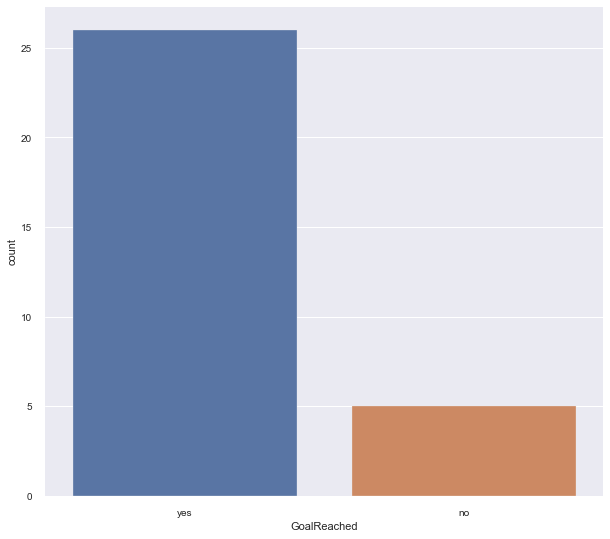

In [11]:
# Count Goal reached column (yes or no). Failed 5 times to reach my goal. 
plt.figure(figsize = (10,9))
sns.countplot(workout['GoalReached'], label = 'Count')

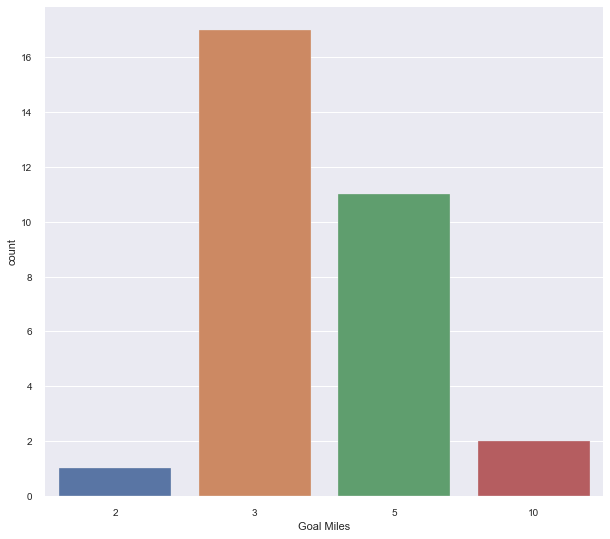

In [12]:
# What are my Cycling Goals for the day?
# Count Goal miles columns (2, 3, 5, and 10). I've selected my goal from Samsung Health app at the start of every workout bike ride. 
plt.figure(figsize = (10,9))
sns.countplot(workout['Goal Miles'], label = 'Count')

In [13]:
# Goal reached - Yes or No and count calories spent during cycling. Unable to reach goal during 5 cycling days. 
workout.iplot(kind = 'bar', x= 'GoalReached', y = 'Calor', title= 'Workout', xTitle='Goal Reached', yTitle='Calor')

In [14]:
# View Distance and calories
fig = px.bar(workout, x="Calor", y="Distance Miles")
fig.show()

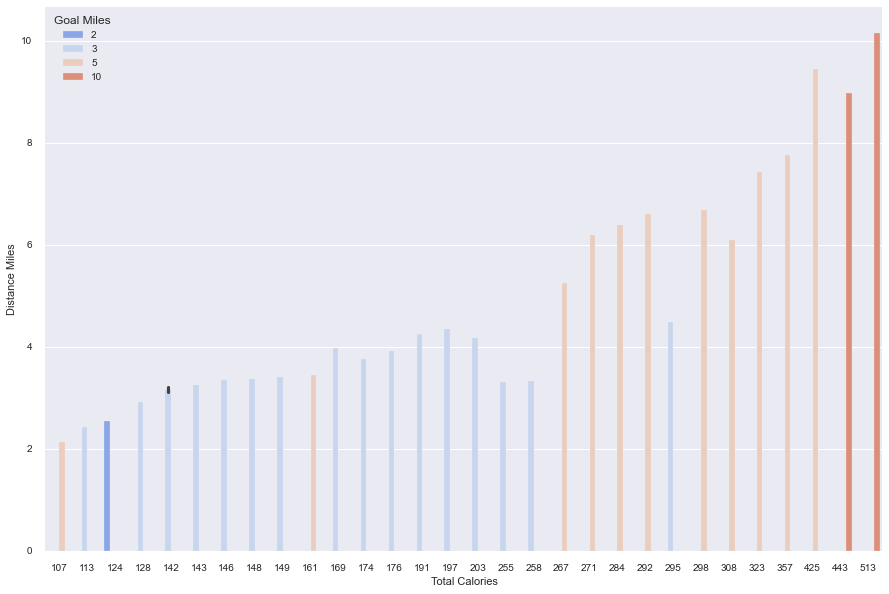

In [15]:
# Most calories spent were during 5 and 10 miles distance 
plt.figure(figsize = (15, 10))
sns.barplot(x='Total Calories', y='Distance Miles', data=workout, hue='Goal Miles', palette='coolwarm')

# Histogram

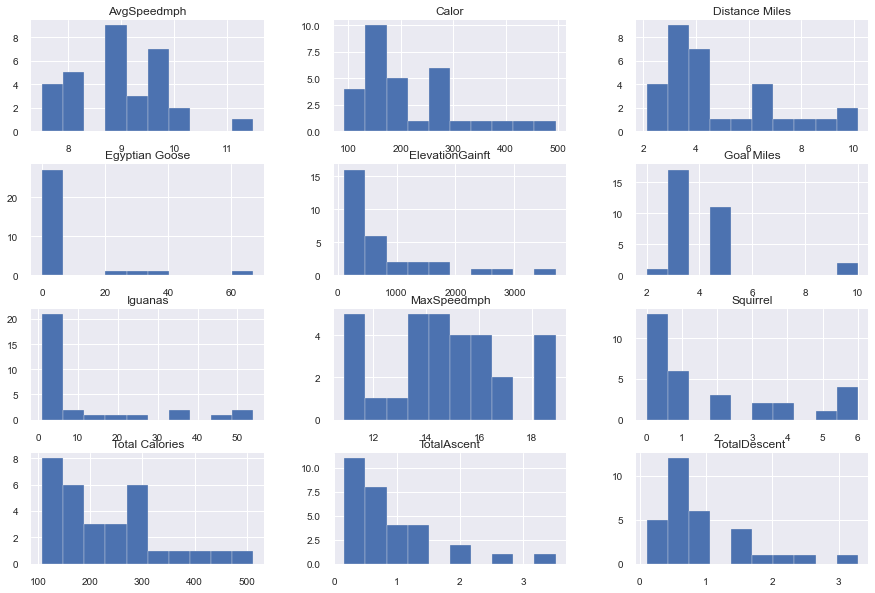

In [16]:
# Plot each of these features. Histogram - Representation of numerical data. It represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.
workout.hist(figsize = (15,10))
plt.show()

# Pairplot

### Plot pairwise relationships in a dataset.

### Pairplot uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal

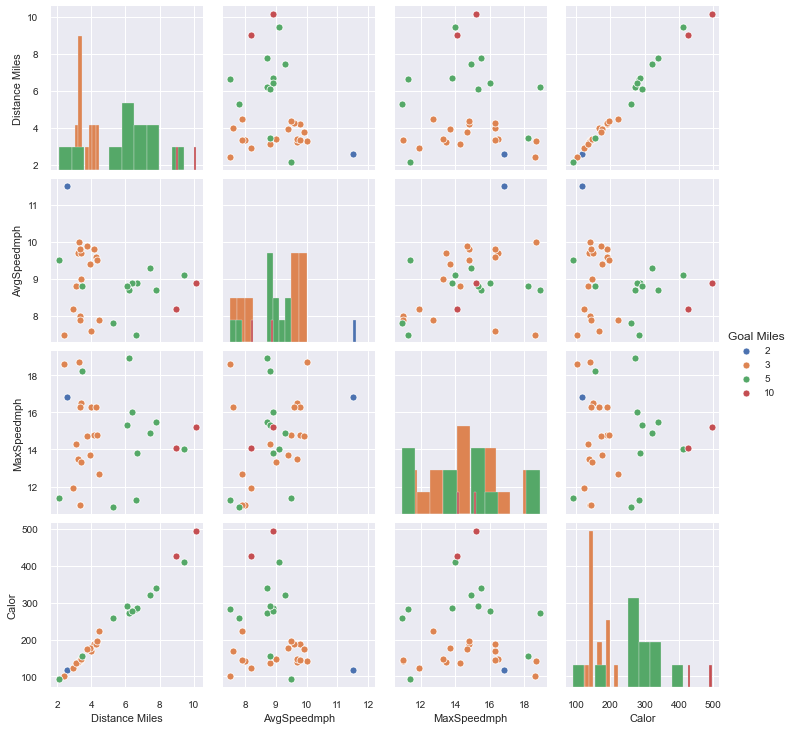

In [17]:
# Display diagonal histogram - Calories, Distance miles, avg/max speed during bike ride. 
sns.pairplot(workout, hue = 'Goal Miles',  diag_kind = 'hist', vars = ['Distance Miles', 'AvgSpeedmph', 'MaxSpeedmph', 'Calor'])

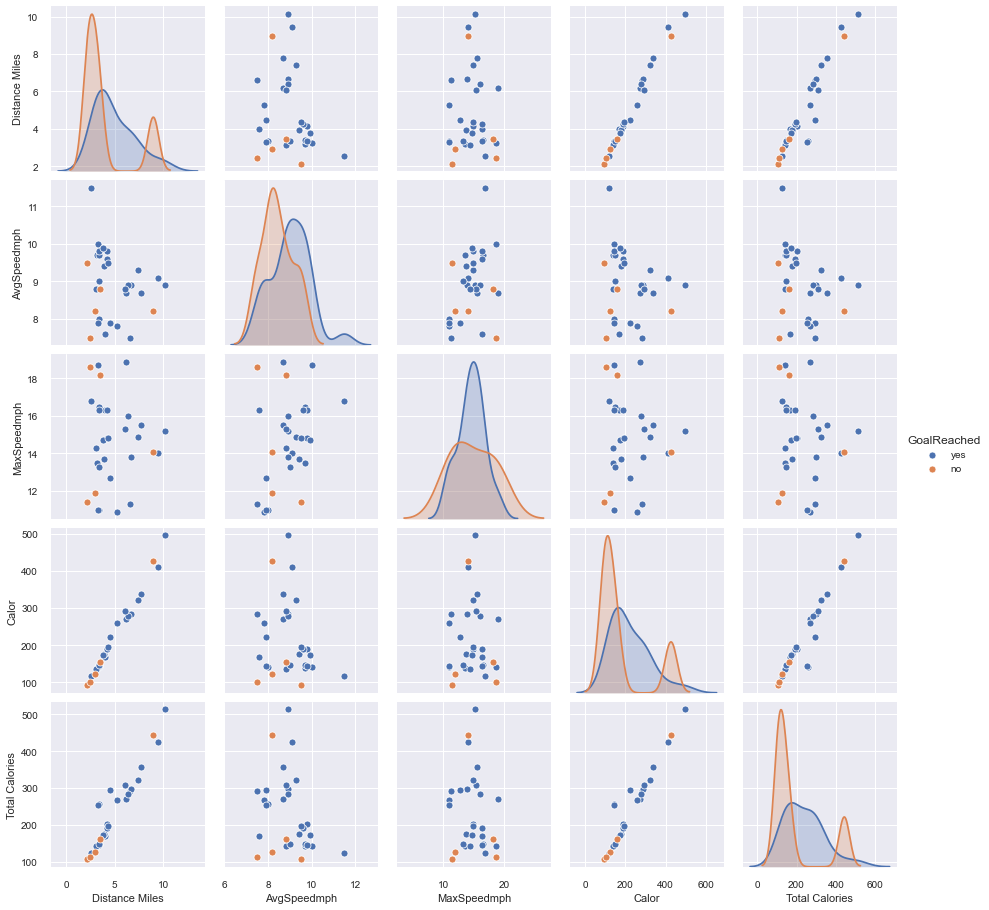

In [18]:
sns.pairplot(workout, hue = 'GoalReached', diag_kind = "kde", vars = ['Distance Miles', 'AvgSpeedmph', 'MaxSpeedmph', 'Calor', 'Total Calories'])

# Scatter Plot

In [19]:
# Scatter plot with Plotly express. Scatter plot shows relationship between two numerical variables 
fig = px.scatter(workout, x = "Calor", y = "Distance Miles")
fig.show()

In [20]:
# Total Calories vs. Distance Miles
fig = px.scatter(workout, x = "Total Calories", y = "Distance Miles")
fig.show()

In [21]:
# iplot is interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots. They let you have a lot of control over how these plots look and they let you zoom, show information on hover and toggle data to be viewed on the chart. 
workout.iplot(x = 'Calor', y = 'Distance Miles', mode = 'markers', size = 20, title = 'Calories and Distance', xTitle='Calories', yTitle='Distance Miles')

In [22]:
workout.iplot(x = 'MaxSpeedmph', y = 'Distance Miles', mode = 'markers', size =5, title = 'Max Speed and Distance', xTitle='MaxSpeedmph', yTitle='DistanceMiles')

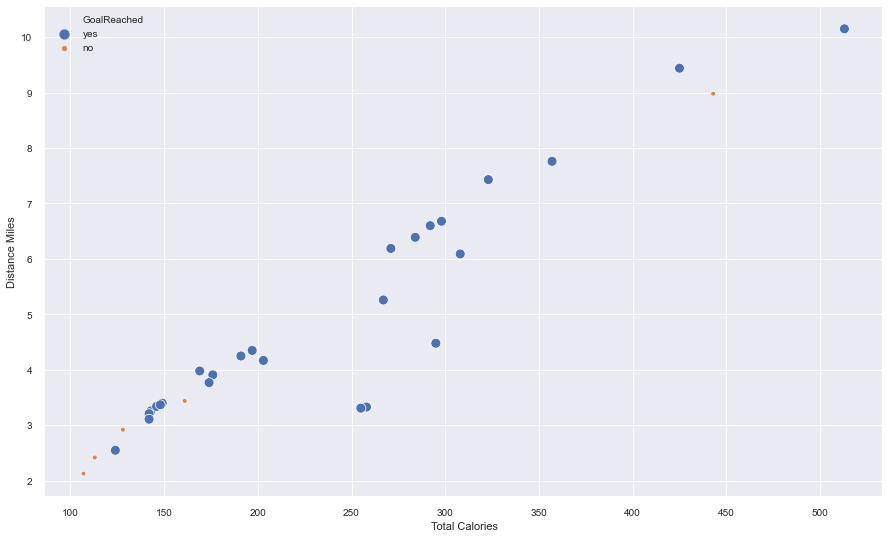

In [23]:
# Distance miles and Total calories are highly correlated and indicates a positive relationship between two variables 
plt.figure(figsize = (15,9))
sns.scatterplot(x = 'Total Calories', y = 'Distance Miles', hue = 'GoalReached', size = "GoalReached", data = workout)

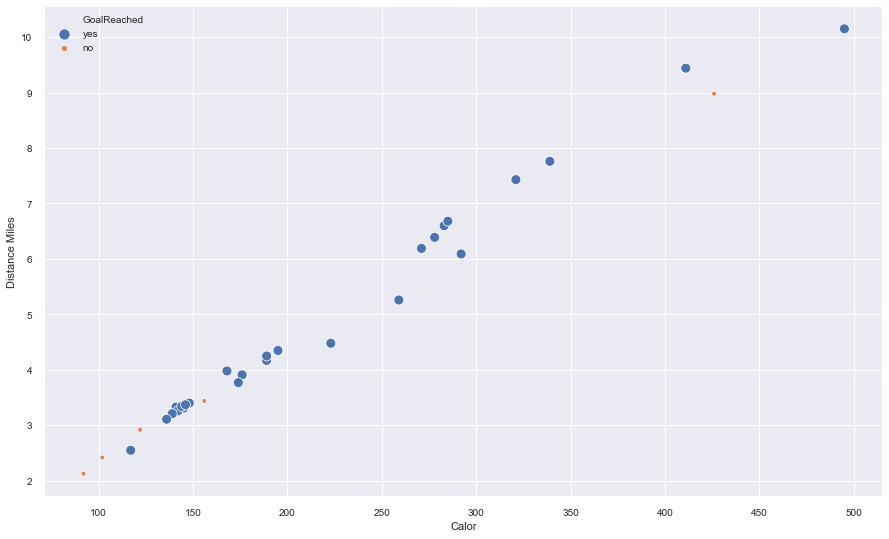

In [24]:
# Distance miles and calories are highly correlated. 
plt.figure(figsize = (15,9))
sns.scatterplot(x = 'Calor', y = 'Distance Miles', hue = 'GoalReached', size = "GoalReached", data = workout)

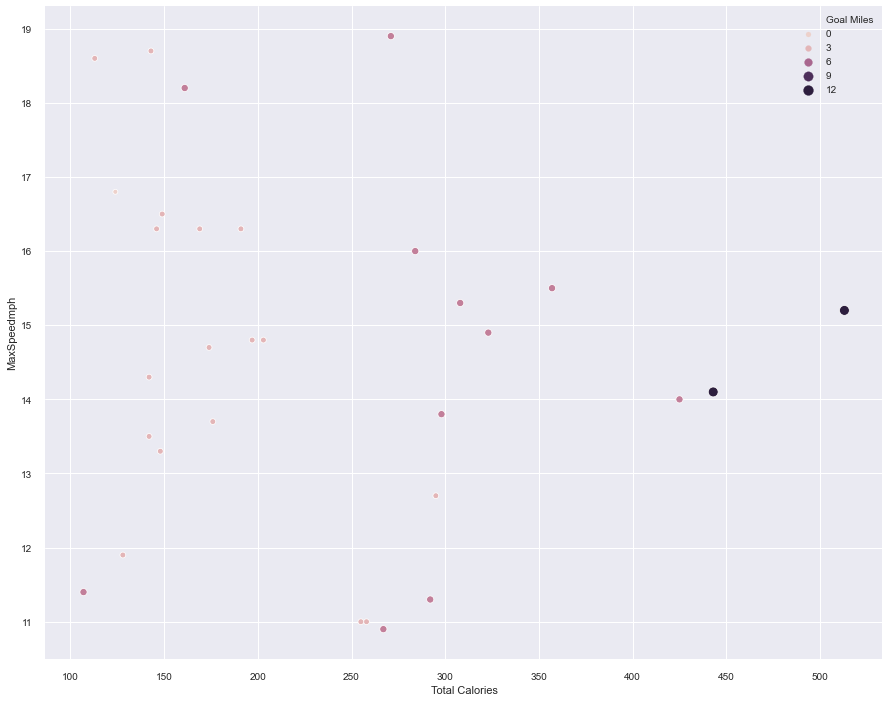

In [25]:
# Total calories vs. Max Speed mph
plt.figure(figsize = (15,12))
sns.scatterplot(x = 'Total Calories', y = 'MaxSpeedmph', hue = 'Goal Miles', size = "Goal Miles", data = workout)

<Figure size 1440x1080 with 0 Axes>

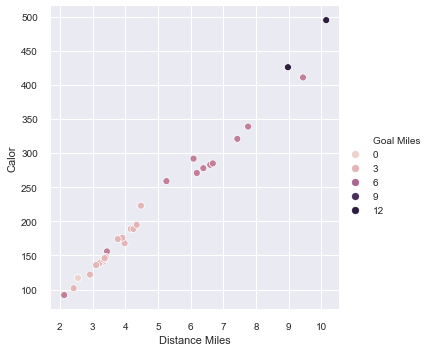

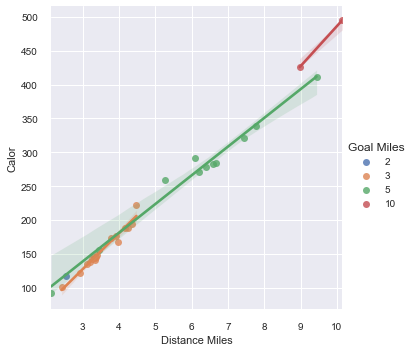

In [26]:
plt.figure(figsize = (20,15))
sns.relplot(data = workout, x="Distance Miles", y="Calor", hue="Goal Miles")
sns.lmplot(data = workout, x="Distance Miles", y="Calor", hue="Goal Miles")

# Plotly 

## The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

## Pie Charts

In [27]:
fig = px.pie(workout, values='Distance Miles', names='Weather', title = 'Cycling Distance Miles')
fig.show()

In [28]:
fig = px.pie(workout, values='Calor', names='GoalReached', title = 'Cycling Goals')
fig.show()

## Sunburst Charts 

### Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves.

In [29]:
# Compare Sunny vs. Partly Cloudy days and calories spent during the bike ride 
fig = px.sunburst(workout, path=['Weather', 'Calor'], values='Distance Miles', title = 'Calories')
fig.show()

In [30]:
# View Goal miles, Goal Reached, and Distance. Distance Miles 67.41 in 5 goal miles and Distance miles 41.73 in 3 goal miles 
fig = px.sunburst(workout, path=['Goal Miles', 'GoalReached', 'Calor'], values='Distance Miles', title = 'Goal and Calories')
fig.show()

## Bar Charts

In [31]:
# Most of the cycling observations are from 3 to 6 miles and calories from 120 to 250
fig = px.bar(workout, x='Workout duration', y='Distance Miles', 
             hover_data=['Workout duration', 'Calor', 'Total Calories'], color='Distance Miles',
             labels={'pop':'Workout duration'}, height=400)
fig.show()

# Heatmaps using Matplotlib and Seaborn

#### Heatmaps visualize the data and represent in the form of a summary through the graph/colored maps.
#### Correlation coefficients are indicators of the strength of the relationship between two different variables.
#### A positive correlation – when the correlation coefficient is greater than 0 – signifies that both variables move in the same direction. When ρ is +1, it signifies that the two variables being compared have a perfect positive relationship; when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude.
#### The closer the value of ρ is to +1, the stronger the linear relationship. A negative (inverse) correlation occurs when the correlation coefficient is less than 0. 

In [32]:
# Find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded.
workout.corr()

,Goal Miles,Distance Miles,Calor,Total Calories,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft,Iguanas,Egyptian Goose,Squirrel
Goal Miles,1.000000,0.803427,0.834286,0.795918,-0.248224,-0.036106,0.798413,0.769536,0.764212,-0.337434,-0.234660,-0.242241
Distance Miles,0.803427,1.000000,0.992805,0.949105,-0.197125,-0.013091,0.733466,0.741132,0.681974,-0.353719,-0.234611,-0.430798
Calor,0.834286,0.992805,1.000000,0.960346,-0.195204,-0.022458,0.803751,0.806033,0.752793,-0.353847,-0.238561,-0.429624
Total Calories,0.795918,0.949105,0.960346,1.000000,-0.301616,-0.160213,0.816869,0.834492,0.790594,-0.416844,-0.279122,-0.455798
AvgSpeedmph,-0.248224,-0.197125,-0.195204,-0.301616,1.000000,0.348938,-0.161132,-0.167905,-0.183440,0.328398,0.235536,0.275741
MaxSpeedmph,-0.036106,-0.013091,-0.022458,-0.160213,0.348938,1.000000,-0.086628,-0.084520,-0.087055,0.051424,-0.040677,-0.020151
TotalAscent,0.798413,0.733466,0.803751,0.816869,-0.161132,-0.086628,1.000000,0.981907,0.967632,-0.302932,-0.216574,-0.369876
TotalDescent,0.769536,0.741132,0.806033,0.834492,-0.167905,-0.084520,0.981907,1.000000,0.977128,-0.294084,-0.195236,-0.371198
ElevationGainft,0.764212,0.681974,0.752793,0.790594,-0.183440,-0.087055,0.967632,0.977128,1.000000,-0.323444,-0.222116,-0.370843
Iguanas,-0.337434,-0.353719,-0.353847,-0.416844,0.328398,0.051424,-0.302932,-0.294084,-0.323444,1.000000,0.589425,0.773907


### Heatmaps vizualizations and positive/negative relationships. 

In [33]:
workout.corr().iplot(kind = 'heatmap', colorscale = 'spectral')

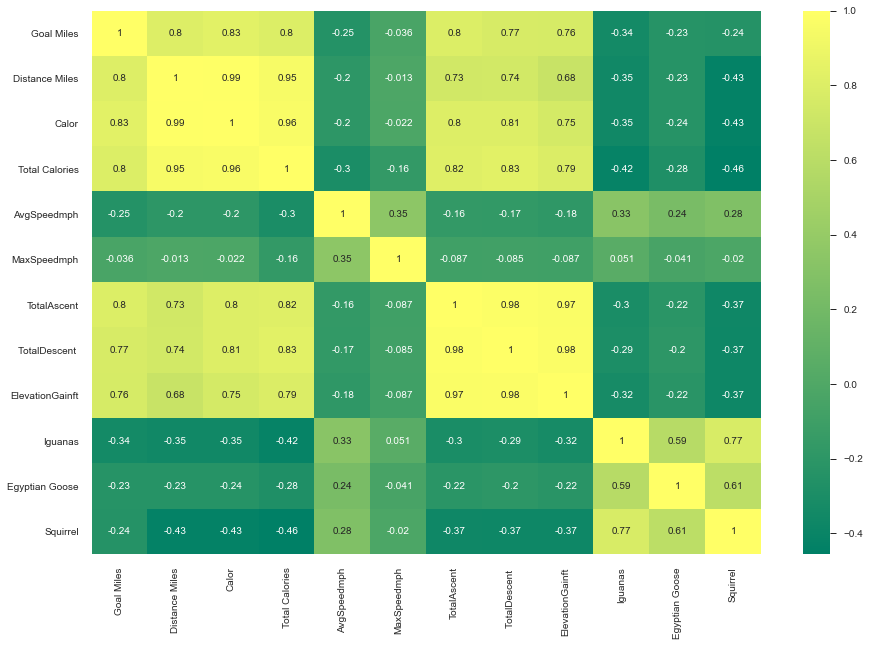

In [34]:
plt.figure(figsize = (15, 10))
sns.heatmap(workout.corr(), cmap='summer', annot=True)

## Pycaret and profile report for the entire dataset 

In [35]:
#w = ProfileReport(workout)
#w

### Data Cleaning

In [36]:
# Drop columns 
workout.drop(['Date', 'Goal Miles','StartTime', 'EndTime', 'Workout duration', 'Total Duration', 'Weather', 'Exercise', 'Tired?', 'Pictures taken', 'Animals seen', 'Iguanas', 'Egyptian Goose', 'Squirrel', 'GoalReached', 'Total Calories'], axis=1, inplace=True)

In [37]:
workout

,Distance Miles,Calor,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft
0,6.19,271,8.7,18.9,0.83,0.81,723
1,3.44,156,8.8,18.2,0.79,0.89,636
2,6.60,283,7.5,11.3,0.58,0.50,428
3,9.44,411,9.1,14.0,1.20,1.57,1105
4,6.68,285,8.9,13.8,0.95,0.91,810
5,10.15,495,8.9,15.2,3.52,3.29,3701
6,8.98,426,8.2,14.1,2.68,2.58,2926
7,6.39,278,8.9,16.0,0.85,0.91,665
8,2.13,92,9.5,11.4,0.16,0.10,111
9,2.55,117,11.5,16.8,0.64,0.69,970


## Splitting the dataset into Training set and Test set

In [38]:
# Independent variable X and Dependent variable y 
# calories (dependent variable) = m1*Goal Miles + m2*Distance Miles + m3*Total Calories...(coefficient*Independent var. or features) + b (intercept)
# y = m1x1 + m2x2 + m3x3 + b

# iloc - integer-location based indexing for selection by position.

X = workout.iloc[:,[0,2,3,4,5,6]]
y = workout.iloc[:, 1]

In [39]:
# Independent variable
X  

,Distance Miles,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft
0,6.19,8.7,18.9,0.83,0.81,723
1,3.44,8.8,18.2,0.79,0.89,636
2,6.60,7.5,11.3,0.58,0.50,428
3,9.44,9.1,14.0,1.20,1.57,1105
4,6.68,8.9,13.8,0.95,0.91,810
5,10.15,8.9,15.2,3.52,3.29,3701
6,8.98,8.2,14.1,2.68,2.58,2926
7,6.39,8.9,16.0,0.85,0.91,665
8,2.13,9.5,11.4,0.16,0.10,111
9,2.55,11.5,16.8,0.64,0.69,970


In [40]:
# Dependent variable
y

0     271
1     156
2     283
3     411
4     285
5     495
6     426
7     278
8      92
9     117
10    339
11    122
12    292
13    223
14    141
15    259
16    145
17    102
18    168
19    321
20    142
21    189
22    139
23    148
24    176
25    144
26    189
27    136
28    174
29    195
30    146
Name: Calor, dtype: int64

In [41]:
# Split dataset into Training and test set 

# X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model.
# X_test  - This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.
# y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.
# y_test  - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [42]:
X_train.shape

(24, 6)

In [43]:
X_train

,Distance Miles,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft
11,2.92,8.2,11.9,0.16,0.21,152
17,2.42,7.5,18.6,0.17,0.23,141
23,3.40,9.7,16.5,0.43,0.50,288
5,10.15,8.9,15.2,3.52,3.29,3701
16,3.31,7.9,11.0,1.33,1.55,1511
8,2.13,9.5,11.4,0.16,0.10,111
14,3.33,8.0,11.0,0.21,0.25,202
24,3.91,9.4,13.7,0.70,0.67,383
20,3.26,10.0,18.7,0.43,0.52,279
1,3.44,8.8,18.2,0.79,0.89,636


In [44]:
X_test.shape

(7, 6)

In [45]:
X_test

,Distance Miles,AvgSpeedmph,MaxSpeedmph,TotalAscent,TotalDescent,ElevationGainft
2,6.60,7.5,11.3,0.58,0.50,428
29,4.35,9.5,14.8,0.89,0.53,315
13,4.48,7.9,12.7,1.35,1.53,1647
10,7.76,8.7,15.5,1.20,1.42,1408
27,3.11,8.8,14.3,0.40,0.42,276
25,3.34,9.8,16.3,0.38,0.44,257
22,3.21,9.7,13.5,0.22,0.53,275


In [46]:
y_train.shape

(24,)

In [47]:
y_train

11    122
17    102
23    148
5     495
16    145
8      92
14    141
24    176
20    142
1     156
30    146
6     426
4     285
18    168
28    174
19    321
9     117
7     278
26    189
3     411
0     271
21    189
15    259
12    292
Name: Calor, dtype: int64

In [48]:
y_test.shape

(7,)

In [49]:
y_test

2     283
29    195
13    223
10    339
27    136
25    144
22    139
Name: Calor, dtype: int64

## Training the Multiple Linear Regression Model on the Training set 

In [50]:
from sklearn.linear_model import LinearRegression  # sklearn library, linear_model module, and LinearRegression class
regressor = LinearRegression()        # create an instance of the model, which we do simply calling the LinearRegression function from Scikit-Learn. regressor is created as an instance of the linear regression class. Build the multiple linear regression model
regressor.fit(X_train, y_train)       # Fit the model on the training data. Train the training set 

LinearRegression()

In [51]:
# Coefficients
regressor.coef_

array([ 4.16505472e+01,  6.91672346e-01,  3.13986542e-01,  4.29675352e+01,
       -2.26439399e+01, -8.86626099e-04])

In [52]:
# Intercept
regressor.intercept_

-13.202590342149477

In [53]:
# Row 11
regressor.predict([[2.92,8.2,11.9,0.16,0.21,152]])

array([119.80997165])

In [54]:
# Row 7
regressor.predict([[6.39,8.9,16.0,0.85,0.91,665]])

array([279.45088807])

In [55]:
# Predict calories using Distance Miles 6
regressor.predict([[6,8.9,16.0,0.85,0.91,665]])

array([263.20717467])

## Predict the Test set results

In [56]:
# Predicting the Test set result
y_pred = regressor.predict(X_test)   # Model has been fit we can make predictions by calling the predict command. We are making predictions on the testing set.
y_pred

array([283.64633617, 205.15570905, 204.74437306, 339.04827478,
       134.33918617, 143.94307385, 128.65145366])

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Check the predictions against the actual values by using the RMSE, R-2 metrics, mean absolute error. 3 metrics commonly used to evaluate regression tasks:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
test_set_r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [58]:
# Results
print("Mean Squared Error:",test_set_rmse) # For rmse, the lower that value is, the better the fit
print("R score:",test_set_r2)              # The closer towards 1, the better the fit
print("Mean Absolute Error:",mae)

Mean Squared Error: 8.837261831526568
R score: 0.9853120748709637
Mean Absolute Error: 5.881747610071171
